In [4]:
from tools import cs_omp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img=Image.open('test.jpg')
img_arr=np.array(img)

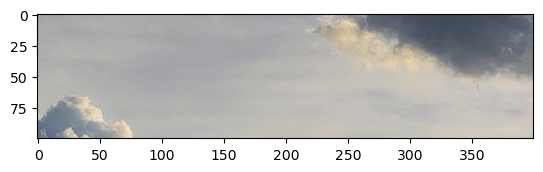

In [12]:
plt.imshow(img_arr[0:100,:,:])
plt.show()

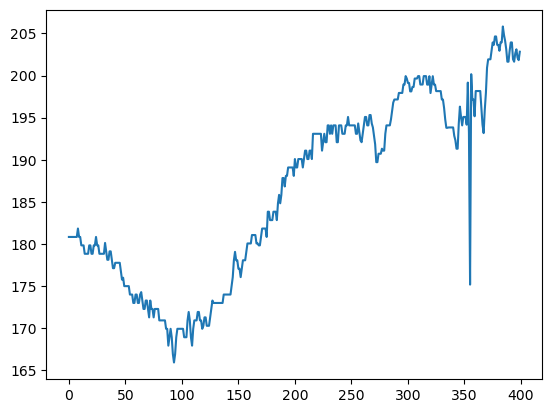

In [31]:
img_line_one=img_arr[59]
img_gray_line_one=[np.dot([0.2989, 0.5870, 0.1140],i) for i in img_line_one]
plt.plot(img_gray_line_one)
plt.show()

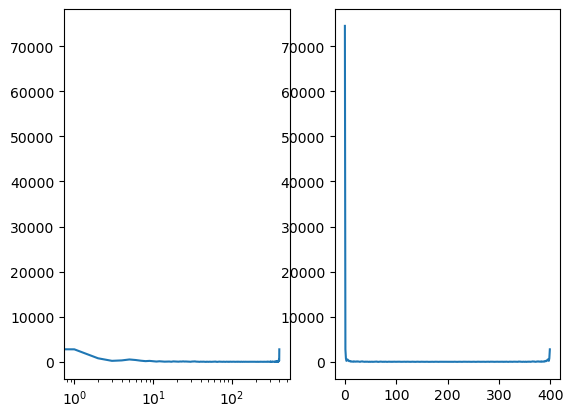

In [32]:
ft_line_one=np.fft.fft(img_gray_line_one)
plt.figure()
plt.subplot(1,2,1)
plt.semilogx(np.abs(ft_line_one))
plt.subplot(1,2,2)
plt.plot(np.abs(ft_line_one))
plt.show()

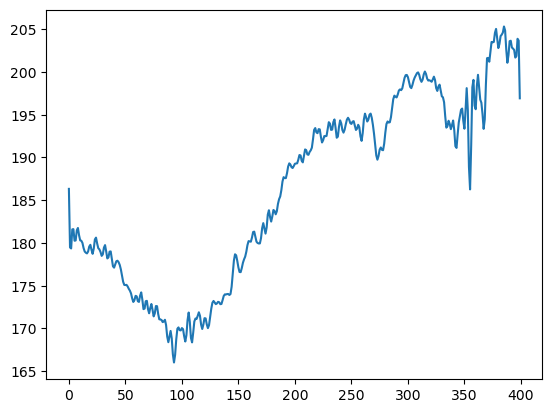

In [34]:
for i in range(101,301):
    ft_line_one[i]=0
img_rebuild=np.fft.ifft(ft_line_one)
plt.plot(img_rebuild)